# JN8: Practice Activity 7
<!-- <img src="Figures/Particle_sliding_on_Double_Pendulum.png" height=300 width=300> -->
```{figure} Figures/Particle_sliding_on_Double_Pendulum.png
:name: particle-sliding-on-doublePendulum

$P$ slides on a double pendulum (made up of two links $A$ and $B$).
```
This notebook use the example of a particle $P$ sliding on a double pendulum (see figure above); this system was first presented to you in the file "7 Particle Kinematics". Your objective is to compute the :
1. $^N{\bf v}^P$, velocity of $P$ in $N$; and
2. $^B{\bf v}^P$, velocity of $P$ in $A$.

You are to complete this task using:
1. the defintions of velocity $^N{\bf v}^P \triangleq \frac{^N d}{dt}{\bf r}_{OP}$ and $^A{\bf v}^P \triangleq \frac{^A d}{dt}{^N{\bf r}^{QP}}$
2. the one-point theorem for velocity.

# Problem set-up
## Create constants using `symbols` and time-varying scalars using `dynamicsymbols`
Below we create the scalar constant $l$, which is the length of the links $A$ and $B$; this is stored as the variable `l_scalar.`:

In [1]:
from sympy import symbols, sin, cos
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, init_vprinting
init_vprinting()
l_scalar = symbols('l')

A similar convention for naming variables is used to create `theta_1_scalar`, `theta_2_scalar`, and `x_scalar` to represent  $\theta_1$, $\theta_2$, and $x$. These are created as `dynamicsymbols` as they signifiy the time-varying variables in the figure above. This is done by:

In [2]:
theta_1_scalar, theta_2_scalar, x_scalar = dynamicsymbols('theta_1, theta_2, x')
x_scalar_dot = dynamicsymbols('x', 1)

## Create and orient reference frames $N$, $A$, and $B$

Next, we create the three reference frames $N$, $A$, and $B$, which are stored in the variable names `N`, `A`, and `B`,  respectively.

In [3]:
N = ReferenceFrame('N')
A = ReferenceFrame('A')
B = ReferenceFrame('B')

Since we are given the angles between the three reference frames, we can use the `.orient` method to define the relative orientations using `sympy`. We can define the  between `N` and `A` (and also between `A` and `B`) using the `'Axis'` rotation type within the `.orient` method, as shown below:

In [4]:
A.orient(N, 'Axis', (theta_1_scalar, N.z))
A.ang_vel_in(N)

In [5]:
B.orient(A, 'Axis', (theta_2_scalar, A.z))
B.ang_vel_in(N)

## Create the points $O$, $Q$, and $P$
Next, we need to create three points:
1. $O$ is the point of contact between link $A$ and ceiling $N$; the corresponding variable name we use is `O`
2. $Q$ is the point of contact between link $A$ and link $B$; the corresponding variable name we use is `Q`
3. $P$ is also modeled as a point (massless particle) that slides on the link $B$; the corresponding variable name is `P`.

Each of these points is made using `Point`, which we import from `sympy.physics.mechanics`, as below:

In [6]:
from sympy.physics.mechanics import Point
O = Point('O')
Q = Point('Q')
P = Point('P')

You can see that this command is quite similar in its syntax to how we create a reference frame using `sympy`'s `ReferenceFrame` feature. As you have seen in this and preceding activities, once we have created a `ReferenceFrame`, we can exploit methods such as `orient`, `set_ang_vel`, and `set_ang_acc` to describe the orientation kinematics. Similarly, we can use the `Point` class to define the translational kinematics; in other words, we can exploit methods that are bundled with the `Point` feature of `sympy` to:
1. describe position vectors between points using `.set_pos`;
2. define the velocities of points in different frames using `.set_vel`; and
3. accelerations of points in different frames using `.set_acc`.

In the remaining discussion of this chapter, we see how to use these methods in computing the kinematics of points by implementing computational versions of the two-point theorem abd one-point theorem. Let's get started......

From, the figure, we know that ${\bf r}^{OQ}$ is the position vector from $O$ to $Q$. We can use `sympy` to define the location of $Q$ using the `.set_pos()` method on that point. The `.set_pos()` method requires that you (the user) provide two additional details to it:
1. The point from which $Q$'s location is defined relative; in this case, it is $O$.
2. The component form of the vector in an appropriate reference frame. In this case, $l \hat{\bf a}_y$ is the position vector ${\bf r}^{OQ}$, so we provide this as `l_scalar*A.y` to the `.set_pos()`.
This is shown below:

In [7]:
Q.set_pos(O, l_scalar*A.y)

As you can see, this method does not print anything in an output cell. However, the computer stores this information internally. To access this information, we have another method that we can use for any point called `.pos_from`. This can be used to examine the position vector as shown below. Note that, I choose to actually store the output of `.pos_from` in a variable name `r_OQ_vector` as I know I will need it later for my computations of the two-point theorem.

In [8]:
r_OQ_vector = Q.pos_from(O)
r_OQ_vector

Similarlyl, we can configure the $P$ by making use of the two methods described above, `set_pos` and `pos_from`, on P. Then, we can store the position vector information about P relative to Q (i.e., ${\bf r}^{QP}$) in the variable name `r_QP_vector`. This is shown below:

In [9]:
P.set_pos(Q, x_scalar*B.y)
r_QP_vector = P.pos_from(Q)
r_QP_vector

Now, from out lecture notes, we know that ${\bf r}^{OP}$,the position vector from $O$ to $P$, is given by:

<!-- <img src="Figures/r_OP.png" height=400 width=400> -->
```{figure} Figures/r_OP.png
```

So, we can use `sympy` and our knowledge of vector addition to compute this position vector using the `r_OQ_vector` and `r_QP_vector`. I store this information in a variable `r_OP_vector`, as shown below:

In [10]:
r_OP_vector = r_OQ_vector + r_QP_vector
r_OP_vector

Next, I describe how we can exploit `sympy` and our knowledge on vector calculus to compute velocities of $P$ from diffrerent reference frames.

# Approach 1: Using definitions

## Compute $^N{\bf v}^P$

The classical definition of velocity is well known (see figure below):

<!-- <img src="Figures/NvP_approach_1.png" height=200 width=200> -->
```{figure} Figures/NvP_approach_1.png
```
We use that and our knowledge of taking time derivatives in `sympy` to compute $^N{\bf v}^P$, which is stored in the variable `N_v_P_approach1`.

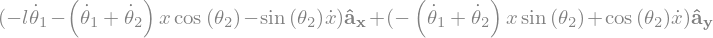

In [11]:
N_v_P_approach1 = r_OP_vector.dt(N)
N_v_P_approach1.express(A)

## Compute $^A{\bf v}^P$

$^A{\bf v}^P$ is also computed in a similar fashion using classical definition and sympy; this information is stored in the variable name `A_v_P_approach1`. See below:

In [12]:
A_v_P_approach1 = r_QP_vector.dt(A)
A_v_P_approach1.express(A)

# Approach 2: Implementing one point theorem
In this section, we learn to compute the two velocities $^N{\bf v}^P$ and $^A{\bf v}^P$ using the one-point theorem.
## Compute $^N{\bf v}^P$

To begin, we must first identify correctly how to utilize the one-point theorem. This has been explained in the video lecture so reference that to referesh your memory. In the image below, the resulting equation from correctly applying the one point theorem to compute $^N{\bf v}^P$ is repeated from the handwritten notes :

<!-- <img src="Figures/NvP_one_point.png" height=300 width=300> -->
```{figure} Figures/NvP_one_point.png
```

The right hand side of the above equation tells us what we need to compute. Specifically, it tells us we will need to compute the following to determine $^N{\bf v}^P$ in `sympy`:
1. $^B{\bf v}^P$, which we can easily evaluate from the figure; 
2. $^N{\bf v}^Q$, which we compute using the two-point theorem. This is discussed in greater detail below (and also covered in the lecture notes);
3. $^N{\bf \omega}^B$; this information is actually already available from approach 1 above, where we used the `.orient` method. However, we haven't stored this in a variable, which we will do in the steps that follow below; and
4. ${\bf r}^{QP}$, which we have already computed above for Approach 1; this is already stored in the variable name `r_QP_vector`.

### Step 1: Define $^B{\bf v}^P$ using `.set_vel`
From the figure, we can easily compute the $^B{\bf v}^P = \dot x \hat {\bf b}_y$. We can then use the `.set_vel` to set the velocity of `P` in the `B`-frame. This is then stored in the variable `B_v_P_vector` using `.vel` method.

___The difference between `.set_vel` and `.vel`: the former lets us define the velocity and store it within the computer without an output; the latter method allows a human to access the velocity vector for future computation__. In other words, their behaviour is similar to what we see for creating position vectors using `.set_pos` and accessing it using `.pos_from`.

This is shown below:

In [13]:
P.set_vel(B, x_scalar_dot*B.y)
B_v_P_vector = P.vel(B)
B_v_P_vector

### Step 2: Compute $^N{\bf v}^Q$
To compute this velocity, $^N{\bf v}^Q$, we make use of the two point theorem. This is shown below from the lecture notes:
<!-- <img src="Figures/NvQ_two_point.png" height=300 width=300> -->
```{figure} Figures/NvQ_two_point.png
```

From the figure it is clear that point $O$ is fixed in the two frames $N$ and $A$. So, for all our `sympy`-bsed computations, we need to ensure that $O$ is fixed in frames $N$ and $A$ as a point of zero velocity. This is done using our tried and tested `.set_vel` method, as shown below:

In [14]:
O.set_vel(N, 0)
O.set_vel(A, 0)

Further, as we know that the two-point theorem for $^N{\bf v}^Q$ requires $^N{\bf v}^O$, we store this latter velocity in the variable named `N_v_O_vector` using the `.vel` method.

In [15]:
N_v_O_vector = O.vel(N)

In approach 1, we defined the orientaion of $A$ in $N$. So, we can easily use the `.ang_vel_in` method to store the angular velocity of A in N ($^N\omega^A$) in the variable `N_w_A_vector`:

In [16]:
N_w_A_vector = A.ang_vel_in(N)

Finally, we can compute the $^N{\bf v}^Q$ by defining the the two-point formula, as below:

In [17]:
N_v_Q_vector = N_v_O_vector + N_w_A_vector.cross(r_OQ_vector)
N_v_Q_vector

### Step 3: Store $^N\omega^B$ for use in one-point formula
We can store $^N\omega^B$ in the variable `N_w_B_vector` using the `.ang_vel_in` method on B, as shown below:

In [18]:
N_w_B_vector = B.ang_vel_in(N)

### Step 4: Finally, compute $^N{\bf v}^P$
Now, we can finally compute the $^N{\bf v}^P$ by implementing the one point theorem (repeating the hand-written equation so you can avoid scrolling up):

<!-- <img src="Figures/NvP_one_point.png" height=300 width=300> -->
```{figure} Figures/NvP_one_point.png
```

Indeed, we will store $^N{\bf v}^P$ in a variable named `N_v_P_vector_approach2` to be clear that we are using our second approach here. In `sympy`, we  implement the handwritten equation to compute $^N{\bf v}^P$ by making use of vector addition (which you have already learned) as follows:

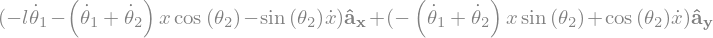

In [19]:
N_v_P_vector_approach2 = B_v_P_vector + N_v_Q_vector + N_w_B_vector.cross(r_QP_vector)
N_v_P_vector_approach2.express(A)

## Compute $^A{\bf v}^P$
By one-point theorem, we know that $^A{\bf v}^P$ can be evaluated using:

<!-- <img src="Figures/AvP_one_point.png" height=300 width=300> -->
```{figure} Figures/AvP_one_point.png
```

So, we can do this entire computation in `sympy` through the few lines of code written below (This is very similar to how we computed $^N{\bf v}^P$). Note that:
1. we have already computed and stored $^B{\bf v}^P$ in `B_v_P_vector`; and
2. we have already computed and stored ${\bf r}^{QP}$ in `r_QP_vector`.

We discuss the evaluation of the other terms in the below steps.
### Step 1: Set velocity of $Q$ to zero in $A$ and $B$
Since Q is a point shared by and also fixed in the bodies $A$ and $B$, we use the `.set_vel` method to set its velocity to be zero. We then store this in the `A_v_Q_vector` for accessing in later computations:

In [20]:
Q.set_vel(A, 0)
Q.set_vel(B, 0)
A_v_Q_vector = Q.vel(A)
A_v_Q_vector

### Step 2: Store $^A\omega^B$ to  use in one-point theorem
In approach 1, we already used the `orient` method on $B$ to define its orientaiton relative to $A$. So, we can readily access its angular velocity using the `.ang_vel_in` method on B. For future use, we store $^A\omega^B$ in the variable `A_w_B_vector`, as shown below:

In [21]:
A_w_B_vector = B.ang_vel_in(A)

### Step 3: Finally, compute $^N{\bf v}^P$
Now, we can finally compute the $^A{\bf v}^P$ by implementing the appropriate version of the one-point theorem in `sympy`. We store $^A{\bf v}^P$ in the variable `A_v_P_vector_approach2`.

In [22]:
A_v_P_vector_approach2 = B_v_P_vector + A_v_Q_vector + A_w_B_vector.cross(r_QP_vector)
A_v_P_vector_approach2.express(A)

We can also compare that the resulting velocities are the same using either approach by comparing the `A_v_P_vector_approach2` is identical to `A_v_P_vector_approach1` as below:

In [23]:
A_v_P_vector_approach2.express(A) == A_v_P_approach1.express(A)

True

In English, we can say that the above input line is essentially us asking the computer: is the `A_v_P_vector_approach2` the same as `A_v_P_approach1`? Or, in other words, are the two approaches to computing velocities identical?

The `==` sign is one type of a comparison operator in computer programming. For those interested in learning more, they are discussed [here](https://www.tutorialspoint.com/python/comparison_operators_example.htm).